# Application Project Milestone 2

## 4. Performance Comparison

In [17]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_rel
from itertools import combinations

In [18]:
# # Load the data
# X_train_raw = pd.read_csv('Raw_features/X_train.csv')
# y_train_raw = pd.read_csv('Raw_features/y_train.csv')
# X_test_raw  = pd.read_csv('Raw_features/X_test.csv')
# y_test_raw  = pd.read_csv('Raw_features/y_test.csv')

# print(X_train_raw.shape)
# print(y_train_raw.shape)
# print(X_test_raw.shape)
# print(y_test_raw.shape)

# X_train_cluster = pd.read_csv('Cluster_based_features/X_cluster_train.csv')
# y_train_cluster = pd.read_csv('Cluster_based_features/Y_cluster_train.csv')
# X_test_cluster  = pd.read_csv('Cluster_based_features/X_cluster_test.csv')
# y_test_cluster  = pd.read_csv('Cluster_based_features/Y_cluster_test.csv')

# print(X_train_cluster.shape)
# print(y_train_cluster.shape)
# print(X_test_cluster.shape)
# print(y_test_cluster.shape)

# # Merge the raw and cluster based features together
# X_train = pd.concat([X_train_raw, X_train_cluster], axis=1)
# y_train = y_train_raw
# X_test = pd.concat([X_test_raw, X_test_cluster], axis=1)
# y_test = y_test_raw

# # Drop null values
# X_train.dropna(inplace=True)
# y_train = y_train.iloc[X_train.index]
# X_test.dropna(inplace=True)
# y_test = y_test.iloc[X_test.index]

# print(X_train.shape)
# print(y_train.shape)
# print(X_test.shape)
# print(y_test.shape)

# # Store the merged data into Cluster_based_features_merged folder
# X_train.to_csv('Cluster_based_features_merged/X_train.csv', index=False)
# y_train.to_csv('Cluster_based_features_merged/Y_train.csv', index=False)
# X_test.to_csv('Cluster_based_features_merged/X_test.csv', index=False)
# y_test.to_csv('Cluster_based_features_merged/Y_test.csv', index=False)

In [19]:
def read_xy(x_path, y_path):
    X = pd.read_csv(x_path).values
    y = pd.read_csv(y_path).values.ravel()
    return X, y

# Training sets
train_sets = {
    'Raw': read_xy('./Raw_features/X_train.csv', './Raw_features/y_train.csv'),
    'Hand-selected': read_xy('./Hand_selected_features/X_train.csv', './Hand_selected_features/Y_train.csv'),
    'Cluster': read_xy('./Cluster_based_features/X_cluster_train.csv', './Cluster_based_features/Y_cluster_train.csv'),
    # 'Cluster_Merged': read_xy('./Cluster_based_features_merged/X_train.csv', './Cluster_based_features_merged/Y_train.csv'),
    'PCA_2': read_xy('./PCA_transformed_features/X_train_pca.csv', './PCA_transformed_features/y_train_pca.csv'),
    'PCA_Opt': read_xy('./PCA_transformed_features/X_train_pca_opt.csv', './PCA_transformed_features/y_train_pca_opt.csv')
}

# Test sets
test_sets = {
    'Raw': read_xy('./Raw_features/X_test.csv', './Raw_features/y_test.csv'),
    'Hand-selected': read_xy('./Hand_selected_features/X_test.csv', './Hand_selected_features/Y_test.csv'),
    'Cluster': read_xy('./Cluster_based_features/X_cluster_test.csv', './Cluster_based_features/Y_cluster_test.csv'),
    # 'Cluster_Merged': read_xy('./Cluster_based_features_merged/X_test.csv', './Cluster_based_features_merged/Y_test.csv'),
    'PCA_2': read_xy('./PCA_transformed_features/X_test_pca.csv', './PCA_transformed_features/y_test_pca.csv'),
    'PCA_Opt': read_xy('./PCA_transformed_features/X_test_pca_opt.csv', './PCA_transformed_features/y_test_pca_opt.csv')
}


### 4.1 Cross Validation

In [20]:
def build_model():
    return MLPRegressor(
        hidden_layer_sizes=(50, 50, 50),
        activation='tanh',
        solver='adam',
        max_iter=1000,
        random_state=0
    )

In [21]:
# # Use consistent cross-validation for all feature sets
kf = KFold(n_splits=10, shuffle=True, random_state=42)

cv_results = {}

for name, (X, y) in train_sets.items():
    model = build_model()
    neg_mse_scores = cross_val_score(model, X, y, cv=kf, scoring="neg_mean_squared_error")
    mse_scores = -neg_mse_scores
    cv_results[name] = mse_scores
    print(f'{name} - Mean MSE: {np.mean(mse_scores):.6f} | Std: {np.std(mse_scores):.6f}')


Raw - Mean MSE: 0.027085 | Std: 0.002047
Hand-selected - Mean MSE: 0.026695 | Std: 0.001927
Cluster - Mean MSE: 0.095755 | Std: 0.004646
PCA_2 - Mean MSE: 0.092218 | Std: 0.006671
PCA_Opt - Mean MSE: 0.026367 | Std: 0.001770


        Raw  Hand-selected   Cluster     PCA_2   PCA_Opt
0  0.026675       0.025478  0.098825  0.104781  0.028484
1  0.025950       0.023811  0.097045  0.079258  0.025556
2  0.026548       0.028232  0.103571  0.096966  0.025932
3  0.029566       0.029812  0.090310  0.095084  0.026459
4  0.025251       0.028445  0.092870  0.088998  0.024537
5  0.028990       0.026824  0.089224  0.090909  0.025510
6  0.024585       0.023485  0.102684  0.090105  0.023530
7  0.030950       0.026667  0.094951  0.098279  0.028730
8  0.027604       0.027972  0.096091  0.091472  0.029178
9  0.024732       0.026221  0.091979  0.086330  0.025750


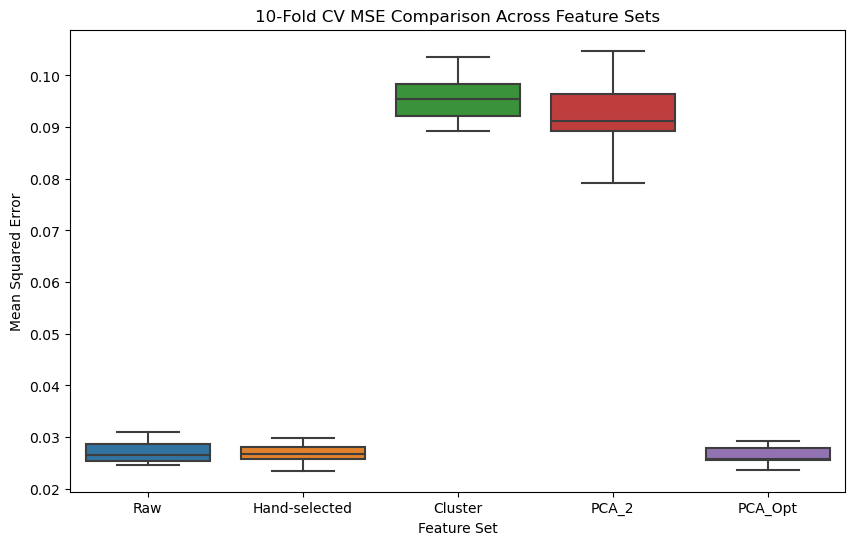

In [22]:
cv_df = pd.DataFrame(cv_results)
print(cv_df)

plt.figure(figsize=(10, 6))
sns.boxplot(data=cv_df)
plt.title('10-Fold CV MSE Comparison Across Feature Sets')
plt.ylabel('Mean Squared Error')
plt.xlabel('Feature Set')
# plt.grid(True)
# Save the plot in images file
plt.savefig('images/10-Fold_CV_MSE_Comparison_Across_Feature_Sets.png')
plt.show()

### 4.2 T-test

In [23]:
feature_sets = list(cv_results.keys())

print("Paired T-Test Results (p-values):\n")
for feat1, feat2 in combinations(feature_sets, 2):
    t_stat, p_val = ttest_rel(cv_results[feat1], cv_results[feat2])
    print(f"{feat1} vs {feat2} → t = {t_stat:.4f}, p = {p_val}")

Paired T-Test Results (p-values):

Raw vs Hand-selected → t = 0.5569, p = 0.5911620333170198
Raw vs Cluster → t = -35.5601, p = 5.4399954194655683e-11
Raw vs PCA_2 → t = -32.2302, p = 1.3097208716251722e-10
Raw vs PCA_Opt → t = 1.2347, p = 0.24819583585407362
Hand-selected vs Cluster → t = -36.0903, p = 4.765628569311591e-11
Hand-selected vs PCA_2 → t = -31.0701, p = 1.8167555548645084e-10
Hand-selected vs PCA_Opt → t = 0.4383, p = 0.6714846980626714
Cluster vs PCA_2 → t = 1.4526, p = 0.18028335106198498
Cluster vs PCA_Opt → t = 40.9132, p = 1.550872015553173e-11
PCA_2 vs PCA_Opt → t = 33.4853, p = 9.310525884639262e-11


In [24]:
test_metrics = {}

for name in train_sets.keys():
    X_train, y_train = train_sets[name]
    X_test, y_test = test_sets[name]

    model = build_model()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    test_metrics[name] = {'MSE': mse, 'R2': r2}

    print(f"{name} → Test MSE: {mse:.4f}, R²: {r2:.4f}")


Raw → Test MSE: 0.0279, R²: 0.8158
Hand-selected → Test MSE: 0.0243, R²: 0.8481
Cluster → Test MSE: 0.0942, R²: 0.4100
PCA_2 → Test MSE: 0.0852, R²: 0.4375
PCA_Opt → Test MSE: 0.0248, R²: 0.8362


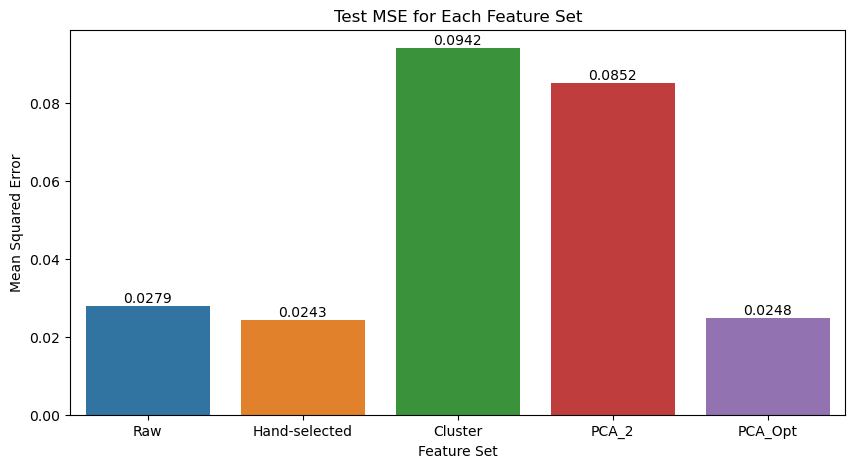

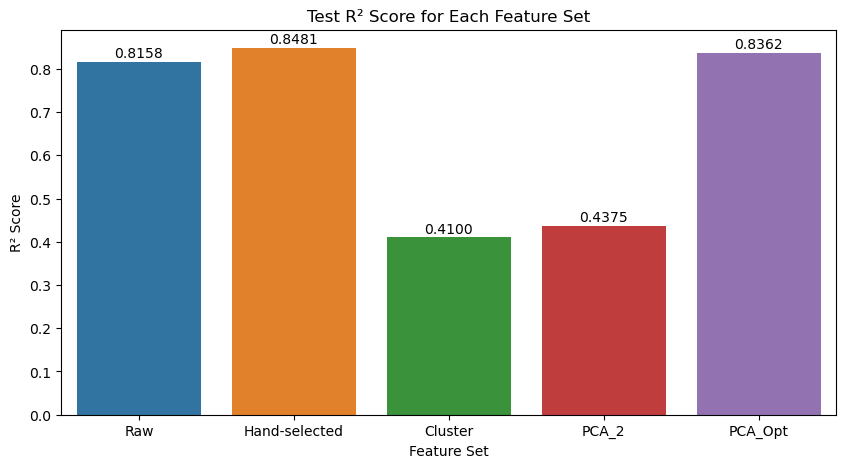

In [25]:
# Convert test metrics to DataFrame
test_df = pd.DataFrame(test_metrics).T  # Transpose for easier plotting

# MSE Bar Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=test_df.index, y=test_df['MSE'])
plt.title('Test MSE for Each Feature Set')
plt.ylabel('Mean Squared Error')
plt.xlabel('Feature Set')
# plt.grid(True)
# Add values on top of bars
for i, v in enumerate(test_df['MSE']):
    plt.text(i, v + 0.001, f'{v:.4f}', ha='center')
# Save the plot in images file
plt.savefig('images/Test_MSE_for_Each_Feature_Set.png')
plt.show()

# R² Bar Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=test_df.index, y=test_df['R2'])
plt.title('Test R² Score for Each Feature Set')
plt.ylabel('R² Score')
plt.xlabel('Feature Set')
# plt.grid(True)
# Add values on top of bars
for i, v in enumerate(test_df['R2']):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center')
# Save the plot in images file
plt.savefig('images/Test_R2_Score_for_Each_Feature_Set.png')
plt.show()
